# **Stock Price Prediction - Simple Linear Regression Model**
COSC 325 Course Project  
Fall 2024
## Members:
  * John Paul Saia  
  * Riley Taylor  
  * Shanna Wallace  

## Objective: 
Create a machine learning model to predict the stock's closing price in 7 days

## The Data
**Data set:** Bershire Hathaway daily stock price and volume traded from 2015-01-02 to 2024-07-29  
**Format:** .csv file  

#### Target and features:

| Target | Description |
| :- | :- | 
| Close 7 Days | Closing price 7 days from the trading day |

<br>

  | Features | Description |
  | :- | :- | 
  | Date | The day the price data is from (yyyy-mm-dd) |
  | Open | Opening price | 
  | High | Highest price |
  | Low | Lowest price |
  | Close | Closing price |
  | Adj Close | Closing price after adjustments for applicable splits and dividend distributions |
  | Volume | Total number of shares traded that day |

## The Linear Regression Model
* Create a simple linear model using 1 highly correlated feature.  
* Create more complex linear model with polynomial expansion.  
* Compare performance of the models.  
* Optimize linear model performance. 
  * Apply techniques to reduce any underfitting or overfitting
<br>

---  


# Create Linear Regression Model:

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

## Load and Prepare Data:
* Load csv file contents to a DataFrame
* Add column for the target, Close 7 Days, by shifting Close by 7 days
* Add the additional features
* Clean the data by removing rows with missing values  

#### Additional Features:
| Features | Description |
| :- | :- | 
| High - Low | Difference between highest and lowest price |
| Open - Close | Amount price changed from open to close |
| 7 Day STD DEV | Standard deviation of closing price over previous 7 days |
| 7 Day MA | Moving averages of closing price over previous 7 days |
| 14 Day MA | Moving averages of closing price over previous 14 days |
| 21 Day MA | Moving averages of closing price over previous 21 days |  

In [75]:
RANDOM_STATE = 42
file = "./berkshire_hathaway_data.csv"
stock_data = pd.read_csv(file)

# Target is next day's closing price
# So want to target row i to correspond to row i-1 in feature columns
# Add a column called next day's close
stock_data['Close 7 Days'] = stock_data['Close'].shift(-7)

stock_data['Day'] = np.arange(len(stock_data.index))
stock_data = stock_data.drop(columns=['Date'])

# Drop the rows with missing data
stock_data = stock_data.dropna().reset_index(drop=True)

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Close 7 Days,Day
2396,420.230011,427.450012,419.700012,424.440002,424.440002,4834600,434.010010,2396
2397,425.589996,434.709991,425.299988,434.420013,434.420013,4594900,432.799988,2397
2398,437.399994,439.049988,434.019989,438.899994,438.899994,4293700,433.290009,2398
2399,437.850006,446.149994,437.839996,445.609985,445.609985,4776600,437.660004,2399
2400,445.619995,449.250000,439.570007,441.820007,441.820007,4638300,438.309998,2400


## Change in Stock Prices Over Time

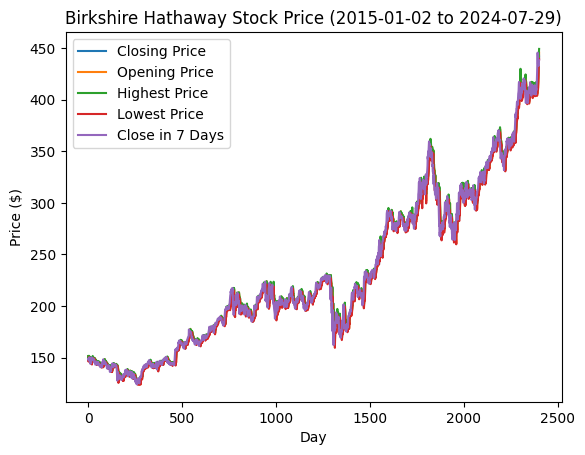

In [76]:
plt.plot(stock_data['Day'], stock_data['Close'], label="Closing Price")
plt.plot(stock_data['Day'], stock_data['Open'], label="Opening Price")
plt.plot(stock_data['Day'], stock_data['High'], label="Highest Price")
plt.plot(stock_data['Day'], stock_data['Low'], label="Lowest Price")
plt.plot(stock_data['Day'], stock_data['Close 7 Days'], label="Close in 7 Days")
plt.title("Birkshire Hathaway Stock Price (2015-01-02 to 2024-07-29)")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

## Feature Selection:
* Generate scatter plot to visualize relationships between variables
* Calculate correlation coefficient of each feature with the target and drop features with correlation value less than 0.5
* Look at the correlation coefficient of the features with the other features and drop ones that are highly correlated with each other


Text(0.5, 1.08, 'Given features')

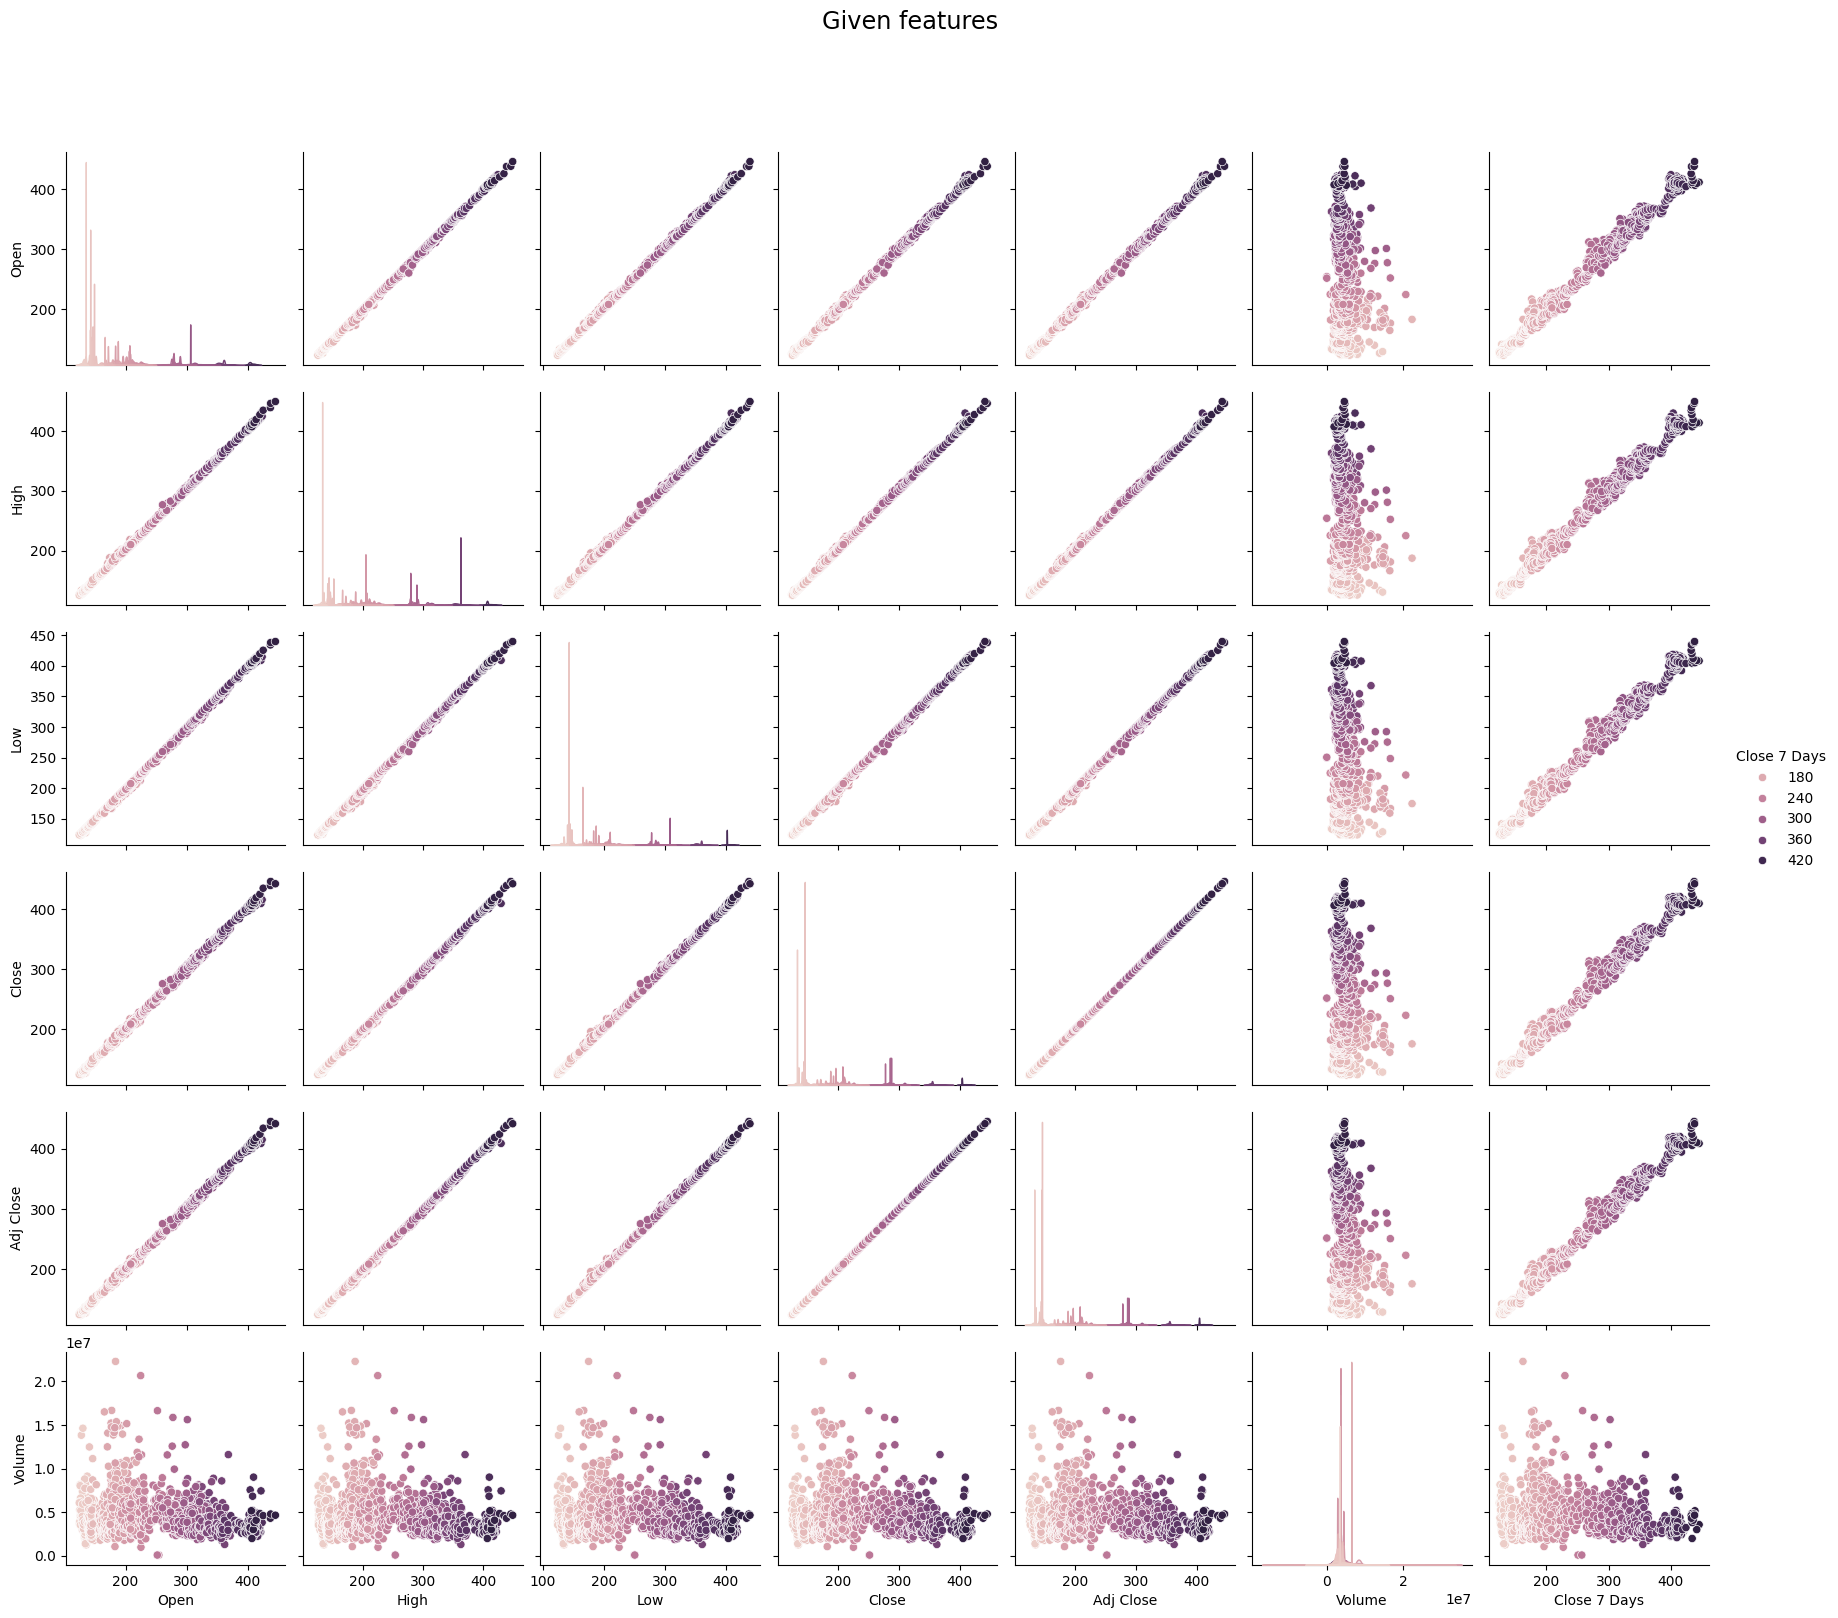

In [46]:
# Display features data trends for the given features with Seaborn pairplot.
given_features = sns.pairplot(stock_data, x_vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close 7 Days'], 
              y_vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], hue='Close 7 Days')
given_features.figure.suptitle("Given features", y=1.08, fontsize='xx-large')

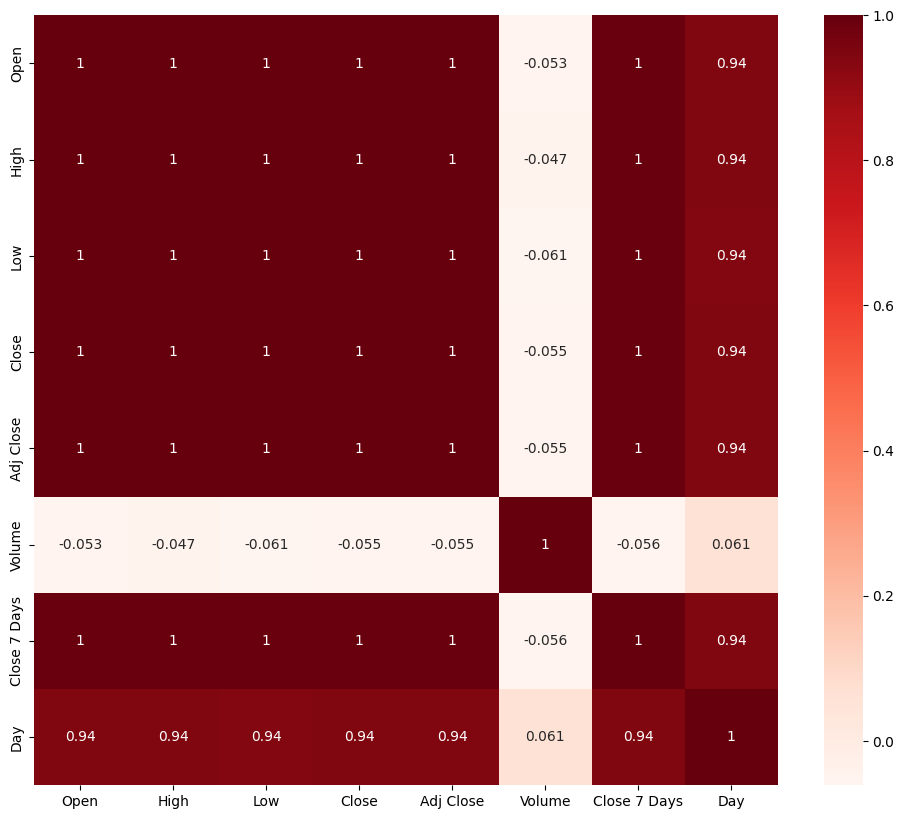

Open            0.995257
High            0.995485
Low             0.995595
Close           0.995708
Adj Close       0.995708
Close 7 Days    1.000000
Day             0.942154
Name: Close 7 Days, dtype: float64


In [77]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = stock_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


#Correlation with output variable
cor_target = abs(cor["Close 7 Days"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


### Create Training and Test Sets
* Extract target and selected features
* Split data in to training and testing sets
    * Training 80% / Testing 20%

In [51]:
# Drop relevant features that are highly correlated with each other
relevant_feature_list = ["Close"]

X_relevant = stock_data[relevant_feature_list]
y = stock_data['Close 7 Days']

# Separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=RANDOM_STATE)

# Print our selected features and set sizes
print(f"Training set size: {X_train.shape[0]}\nTesting set size: {X_test.shape[0]}")


Training set size: 1904
Testing set size: 477


## Simple Linear Regression Model with OLS
### Create and Fit Linear Model using sklearn's default, Ordinary Least Squares

In [64]:
# Create the simple Model
ols_model = LinearRegression()

# Create training sets and train the model
ols_X_train = X_train
ols_X_test = X_test

ols_model.fit(ols_X_train, y_train)


LinearRegression()

### Get Predictions and Analyze Performance
* Plot the model
* Calculate performance metrics:
    * Bias
    * Variance
    * RMSE (Root Mean Squared Error)
    * MAE (Mean Absolue Error)

Simple Model:
  Bias: 5954.939077977813
  Variance: 5768.874228199783
  RMSE: $8.159019159242964
  MAE: $5.503727385093152


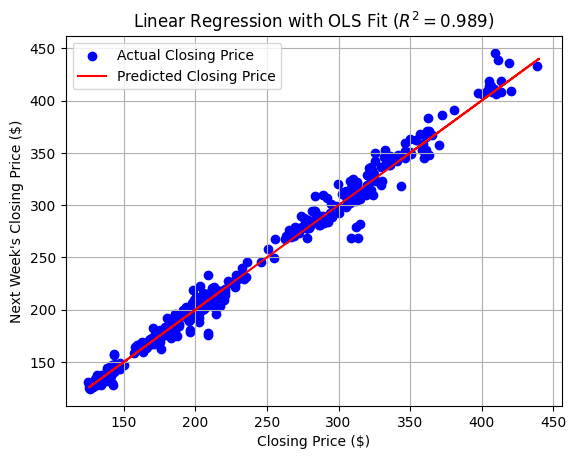

In [65]:
# simple_pred = simple_model.predict(simple_X_test)
ols_pred = pd.Series(ols_model.predict(X_test), index=X_test.index)

# Calculate the mean of the predictions (expected prediction)
ols_mean_pred = np.mean(ols_pred)

# Calculate bias, variance, and Root Mean Squared Error (RMSE) on the test set
ols_bias = np.mean((y_test - ols_mean_pred) ** 2)
ols_variance = np.mean((ols_pred - ols_mean_pred) ** 2)
ols_rmse = root_mean_squared_error(y_test, ols_pred)
ols_r2 = r2_score(y_test, ols_pred)
ols_mae = mean_absolute_error(y_test, ols_pred)

print(f"Simple Model:\n  Bias: {ols_bias}\n  Variance: {ols_variance}\n  RMSE: ${ols_rmse}\n  MAE: ${ols_mae}")

plt.scatter(ols_X_test, y_test, label='Actual Closing Price', color='blue')
plt.plot(ols_pred, ols_pred, label='Predicted Closing Price', color='red')
plt.title(f"Closing Price vs. Next Week's Closing Price (Simple Linear Model)")
plt.title(f"Linear Regression with OLS Fit ($R^2=${ols_r2:.3f})")
plt.xlabel(f"Closing Price ($)")
plt.ylabel("Next Week's Closing Price ($)")
plt.legend()
plt.grid(True)


## Simple Linear Model with Polynomial Expansion
#### Determine optimal number of degrees to use:
* Test degree values 1 through 10 
* Compare R2 and RMSE for each
* Choose degree number that gives highest R2 and lowest RMSE


Degree with maximum R2: 6 with 0.9888337991983369
Degree with minimum RMSE: 6 with $8.154370417446305


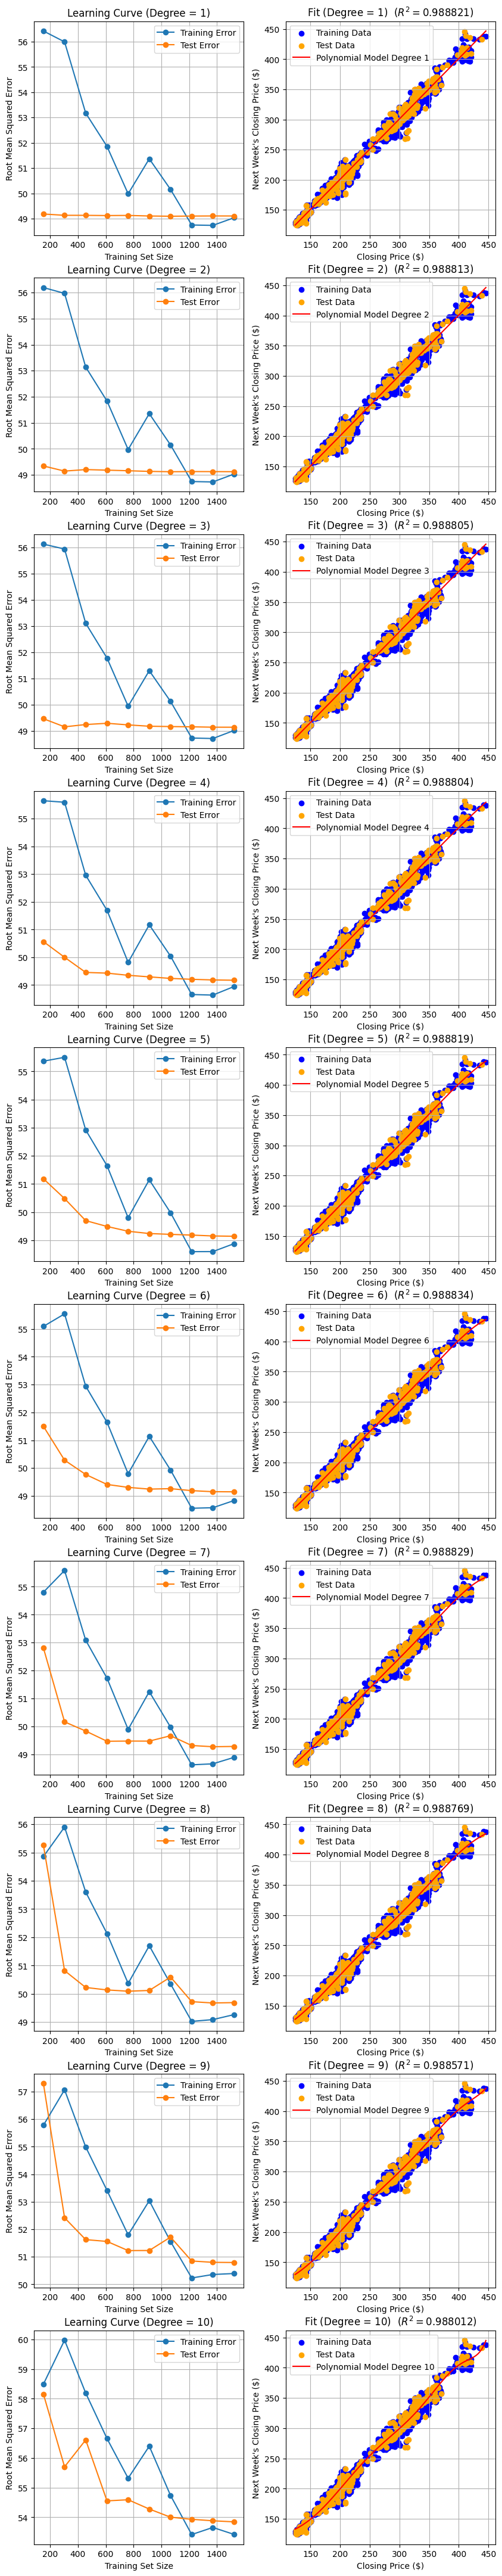

In [67]:
rmse_results = [0] * 10
r2_results = [0] * 10

fig, axes = plt.subplots(10, 2, figsize=(10,55))
# row for the subplot
r = 0

# Define a function for plotting the learning curve
for degree in range(1, 11):
    # Complex Model: Using the features with Polynomial Expansion
    poly = PolynomialFeatures(degree=degree)

    # Transform the training and test data
    X_train_poly = poly.fit_transform(X_train.values)
    X_test_poly = poly.transform(X_test.values)

    # Initialize the linear regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    poly_test_predictions = poly_model.predict(X_test_poly)

    # Calculate the mean of the predictions (expected prediction)
    poly_mean_prediction = np.mean(poly_test_predictions)

    # Calculate learning curves for the polynomial model
    train_sizes, train_scores, test_scores = learning_curve(
        poly_model, X_train_poly, y_train, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=RANDOM_STATE
    )

    # Calculate mean error
    train_errors = -np.mean(train_scores, axis=1)
    test_errors = -np.mean(test_scores, axis=1)


    # set row and column for the subplot
    
    c = 0

    # Plot learning curves
    axes[r,c].plot(train_sizes, train_errors, label='Training Error', marker='o')
    axes[r,c].plot(train_sizes, test_errors, label='Test Error', marker='o')
    axes[r,c].set_title(f'Learning Curve (Degree = {degree})')
    axes[r,c].set_xlabel('Training Set Size')
    axes[r,c].set_ylabel('Root Mean Squared Error')
    axes[r,c].legend()
    axes[r,c].grid(True)

    c += 1

    # Calculate bias, variance, Root Mean Squared Error
    poly_bias = np.mean((y_test - poly_mean_prediction) ** 2)
    poly_variance = np.mean((poly_test_predictions - poly_mean_prediction) ** 2)
    rmse_results[degree - 1] = root_mean_squared_error(y_test, poly_test_predictions)
    r2_results[degree - 1] = r2_score(y_test, poly_test_predictions)

    # Visualize the learning process
    x_curve = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    y_curve_poly = poly_model.predict(poly.transform(x_curve))


    axes[r,c].scatter(X_train, y_train, color='blue', label='Training Data')
    axes[r,c].scatter(X_test, y_test, color='orange', label='Test Data')

    axes[r,c].plot(x_curve, y_curve_poly, color='red', label=f'Polynomial Model Degree {degree}')
    axes[r,c].set_title(f'Fit (Degree = {degree})  ($R^2=${r2_results[degree - 1]:.6f})')
    axes[r,c].set_xlabel("Closing Price ($)")
    axes[r,c].set_ylabel("Next Week's Closing Price ($)")
    axes[r,c].legend()
    axes[r,c].grid(True)

    r += 1
    
# Want to minimize errors and maximize R2
max_r2 = max(r2_results)
min_rmse = min(rmse_results)
print(f"\nDegree with maximum R2: {r2_results.index(max_r2) + 1} with {max_r2}")
print(f"Degree with minimum RMSE: {rmse_results.index(min_rmse) + 1} with ${min_rmse}")

### Create Linear Model with Polynomial Expansion using Best Degree
### Get Predictions and Analyze Performance
* Plot the model
* Calculate performance metrics:
    * Bias
    * Variance
    * RMSE (Root Mean Squared Error)
    * MAE (Mean Absolue Error)

Linear Model with Polynomial Expansion:
  Bias: 5954.947063977885
  Variance: 5764.4225930021175
  RMSE: $8.154370417446305
  MAE: $5.475681641844635


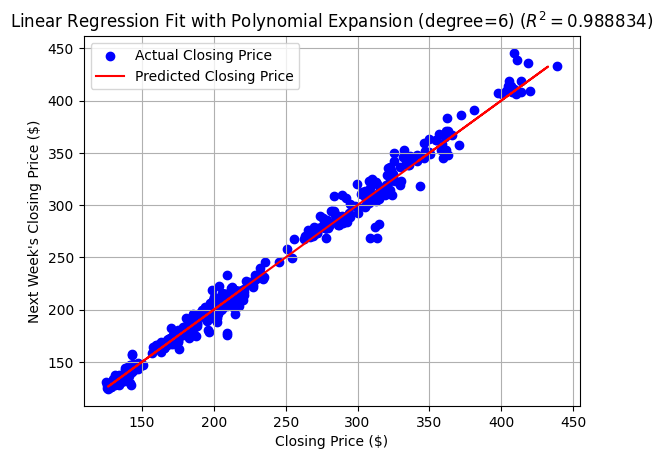

In [55]:
degree = rmse_results.index(min_rmse) + 1

# Complex Model: Using the features with Polynomial Expansion
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

# Calculate the mean of the predictions (expected prediction)
poly_mean_pred = np.mean(poly_pred)

# Calculate bias, variance, and Root Mean Squared Error (RMSE) on the test set
poly_bias = np.mean((y_test - poly_mean_pred) ** 2)
poly_variance = np.mean((poly_pred - poly_mean_pred) ** 2)
poly_rmse = root_mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
poly_mae = mean_absolute_error(y_test, poly_pred)

print(f"Linear Model with Polynomial Expansion:\n  Bias: {poly_bias}\n  Variance: {poly_variance}\n  RMSE: ${poly_rmse}\n  MAE: ${poly_mae}")

plt.scatter(X_test, y_test, label='Actual Closing Price', color='blue')
plt.plot(poly_pred, poly_pred, label='Predicted Closing Price', color='red')
plt.title(f"Linear Regression Fit with Polynomial Expansion (degree={degree}) ($R^2=${poly_r2:.6f})")
plt.xlabel(f"Closing Price ($)")
plt.ylabel("Next Week's Closing Price ($)")
plt.legend()
plt.grid(True)


## Simple Linear Regression Model with Gradient Descent
#### Choose best learning rate 
* Test different **learning rates** to find the **optimal learning rate** that minimizes the cost function most efficiently

In [69]:
# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Define the gradient descent function (with cost history tracking)
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # number of samples
    cost_history = np.zeros(iterations)  # To store the cost at each iteration
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)  # Save the cost at each iteration
    
    return theta, cost_history

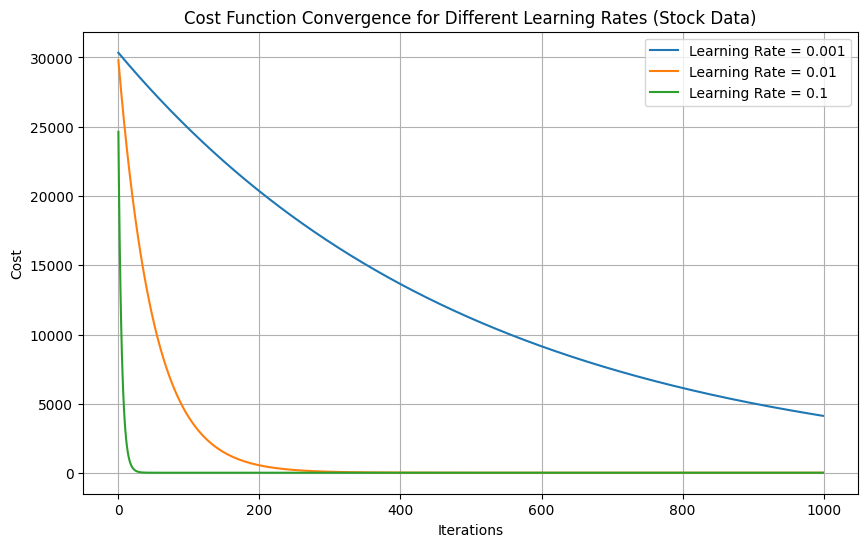

In [70]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to the scaled feature matrices for the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


# Initialize parameters for gradient descent
iterations = 1000
theta = np.zeros(X_train_scaled.shape[1])  # Initialize theta with zeros


# Test with different learning rates
learning_rates = [0.001, 0.01, 0.1]
plt.figure(figsize=(10, 6))

for alpha in learning_rates:
    theta = np.zeros(X_train_scaled.shape[1])  # Reset theta for each learning rate
    theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)
    plt.plot(range(iterations), cost_history, label=f'Learning Rate = {alpha}')


# Plot the cost function convergence
plt.title('Cost Function Convergence for Different Learning Rates (Stock Data)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

### Apply Gradient Descent
* Using the optimal learning rate (alpha) of 0.01 based on the above graph

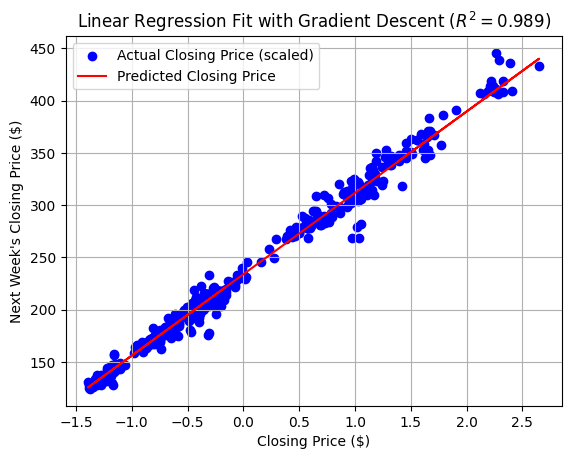

In [80]:
# Gradient Descent with optimal learning rate
alpha = 0.01
theta = np.zeros(X_train_scaled.shape[1])  
theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

# get the predictions for the final theta
gd_pred = np.dot(X_test_scaled, theta)


# RMSE, and R2
gd_rmse = root_mean_squared_error(y_test, gd_pred)
gd_r2 = r2_score(y_test, gd_pred)
gd_mae = mean_absolute_error(y_test, gd_pred)

plt.scatter(X_test_scaled[:,1], y_test, label='Actual Closing Price (scaled)', color='blue')
plt.plot(X_test_scaled[:,1], gd_pred, label='Predicted Closing Price', color='red')
plt.title(f"Linear Regression Fit with Gradient Descent ($R^2=${gd_r2:.3f})")
plt.xlabel(f"Closing Price ($)")
plt.ylabel("Next Week's Closing Price ($)")
plt.legend()
plt.grid(True)
plt.show()



## Compare Performance of OLS, Polynomial Expansion, and Gradient Descent

Linear Regression with OLS:
  R2: 0.988821064044521
  RMSE: $8.159019159242964
  MAE: $5.503727385093152

Linear Regression with Polynomial Expansion):
  R2: 0.9888337991983369
  RMSE: $8.154370417446305
  MAE: $5.475681641844635

Linear Regression with Gradient Descent:
  R2: 0.9888196482115096
  RMSE: $8.159535820353213
  MAE: $5.504007440873246


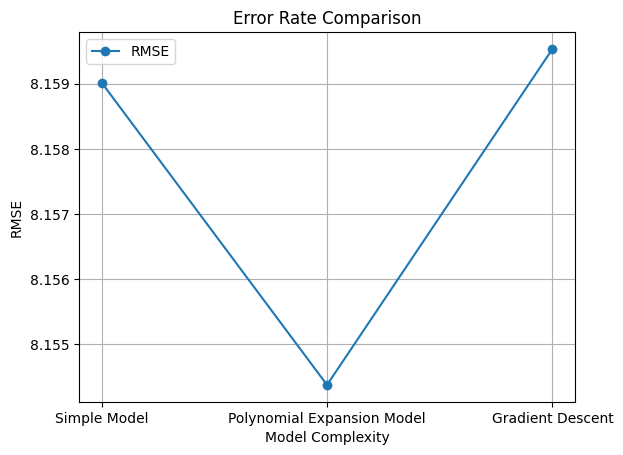

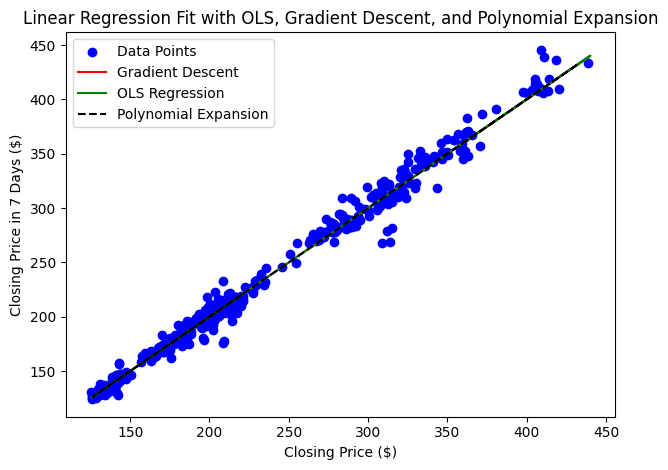

In [81]:
print(f"Linear Regression with OLS:\n  R2: {ols_r2}\n  RMSE: ${ols_rmse}\n  MAE: ${ols_mae}\n")
print(f"Linear Regression with Polynomial Expansion):\n  R2: {poly_r2}\n  RMSE: ${poly_rmse}\n  MAE: ${poly_mae}\n")
print(f"Linear Regression with Gradient Descent:\n  R2: {gd_r2}\n  RMSE: ${gd_rmse}\n  MAE: ${gd_mae}")

# Error Comparison Visualization
model_complexity = ['Simple Model', 'Polynomial Expansion Model', 'Gradient Descent']
mse_scores = [ols_rmse, poly_rmse, gd_rmse]

plt.plot(model_complexity, mse_scores, label='RMSE', marker='o')
plt.title('Error Rate Comparison')
plt.xlabel('Model Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


# Plot the linear fit
x = np.array([0,10]).reshape(-1,1)
x_b = np.c_[np.ones((len(x), 1)), x]
plt.scatter(X_test, y_test, color='blue', label="Data Points")
plt.plot(gd_pred, gd_pred, color='red', label="Gradient Descent")
plt.plot(ols_pred, ols_pred, color='green', label="OLS Regression")
plt.plot(poly_pred,  poly_pred, "--", color='black', label="Polynomial Expansion")
plt.title(f"Linear Regression Fit with OLS, Gradient Descent, and Polynomial Expansion")
plt.xlabel("Closing Price ($)")
plt.ylabel("Closing Price in 7 Days ($)")
plt.legend()
plt.tight_layout()
plt.show()